In [6]:
import qiime2
from qiime2.plugins import (
    demux, dada2, feature_table, metadata, 
    greengenes2, taxa, feature_classifier, 
    vsearch
)

from qiime2 import Artifact, Metadata
import os

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

path = {
    "art" : "../data/artifacts/",
    "vis" : "../visualizations/",
}

for filepath in path.values():
    os.makedirs(filepath, exist_ok=True)

In [7]:
df = pd.read_csv("../data/metadata.csv", index_col="sampleid", 
                 dtype={"sampleid" : str})
metadata_df = Metadata(df)

In [4]:
# import raw data with manifest 
raw_seqs = qiime2.Artifact.import_data('SampleData[PairedEndSequencesWithQuality]', '../data/manifest.tsv', view_type='PairedEndFastqManifestPhred33V2')

# 1. Quality control 
## 1.1. DADA2 - losing too many reads
Clearing sequences from artifacts of sequencing

In [8]:
quality_vis = demux.visualizers.summarize(raw_seqs)
quality_vis.visualization.save(path["vis"] + "quality-plot.qzv")

qc_reads = dada2.methods.denoise_paired(
    raw_seqs, trunc_len_f=290, trunc_len_r=220, n_threads=32,
    min_fold_parent_over_abundance=4
)

qc_reads.denoising_stats.save(path["art"] + "denoise-stats.qza")
qc_reads.table.save(path["art"] + "feature-table.qza")
qc_reads.representative_sequences.save(path["art"] + "rep-seqs.qza")


metadata.visualizers.tabulate(input=qc_reads.denoising_stats.view(Metadata)).visualization.save(path["vis"] + "denoise-stats.qzv")
feature_table.visualizers.summarize(qc_reads.table).visualization.save(path["vis"] + "feature-table.qzv")

/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/conda-envs/qiime2-2023.2/lib/python3.8/site-packages/q2_demux/_summarize/_visualizer.py:191: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  context['result_data'] = context['result_data'].append(df)
/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/conda-envs/qiime2-2023.2/lib/python3.8/site-packages/q2_demux/_summarize/_visualizer.py:191: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  context['result_data'] = context['result_data'].append(df)


Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada.R --input_directory /tmp/tmpsamq21yf/forward --input_directory_reverse /tmp/tmpsamq21yf/reverse --output_path /tmp/tmpsamq21yf/output.tsv.biom --output_track /tmp/tmpsamq21yf/track.tsv --filtered_directory /tmp/tmpsamq21yf/filt_f --filtered_directory_reverse /tmp/tmpsamq21yf/filt_r --truncation_length 290 --truncation_length_reverse 220 --trim_left 0 --trim_left_reverse 0 --max_expected_errors 2.0 --max_expected_errors_reverse 2.0 --truncation_quality_score 2 --min_overlap 12 --pooling_method independent --chimera_method consensus --min_parental_fold 4 --allow_one_off False --num_threads 32 --learn_min_reads 1000000

R version 4.2.2 (2022-10-31) 


Loading required package: Rcpp


DADA2: 1.26.0 / Rcpp: 1.0.10 / RcppParallel: 5.1.6 
2) Filtering ............
3) Learning Error Rates
82082180 total bases in 283042 reads from 12 samples will be used for learning the error rates.
62269240 total bases in 283042 reads from 12 samples will be used for learning the error rates.
3) Denoise samples ............
............
5) Remove chimeras (method = consensus)
6) Report read numbers through the pipeline
7) Write output


'../visualizations/feature-table.qzv'

## 1.2. Demux - even more sequences are lost
Didn't continue analysis after merging

In [5]:
# joined_reads = vsearch.methods.merge_pairs(raw_seqs)

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1824_0_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1824_12_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1824_0_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax 41 --fastq_qmaxout 41 --fasta_width 0 --threads 1



vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     20721  Pairs
     10093  Merged (48.7%)
     10628  Not merged (51.3%)

Pairs that failed merging due to various reasons:
        43  too few kmers found on same diagonal
      4170  too many differences
      4617  alignment score too low, or score drop too high
      1798  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    459.21  Mean fragment length
     21.43  Standard deviation of fragment length
      0.75  Mean expected error in forward sequences
      4.83  Mean expected error in reverse sequences
      0.26  Mean expected error in merged sequences
      0.36  Mean observed errors in merged region of forward sequences
      5.26  Mean observed errors in merged region of reverse sequences
      5.62  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1824_0_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1832_1_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1832_13_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1832_1_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     19426  Pairs
      8366  Merged (43.1%)
     11060  Not merged (56.9%)

Pairs that failed merging due to various reasons:
        37  too few kmers found on same diagonal
      3521  too many differences
      4601  alignment score too low, or score drop too high
         3  overlap too short
      2898  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    458.10  Mean fragment length
     28.62  Standard deviation of fragment length
      0.67  Mean expected error in forward sequences
      4.90  Mean expected error in reverse sequences
      0.30  Mean expected error in merged sequences
      0.29  Mean observed errors in merged region of forward sequences
      5.33  Mean observed errors in merged region of reverse sequences
      5.61  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1832_1_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1840_2_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1840_14_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1840_2_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     29451  Pairs
     12390  Merged (42.1%)
     17061  Not merged (57.9%)

Pairs that failed merging due to various reasons:
        86  too few kmers found on same diagonal
      5340  too many differences
      7645  alignment score too low, or score drop too high
         2  overlap too short
      3988  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    458.55  Mean fragment length
     29.78  Standard deviation of fragment length
      0.67  Mean expected error in forward sequences
      4.87  Mean expected error in reverse sequences
      0.30  Mean expected error in merged sequences
      0.29  Mean observed errors in merged region of forward sequences
      5.49  Mean observed errors in merged region of reverse sequences
      5.78  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1840_2_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1848_3_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1848_15_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1848_3_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     20910  Pairs
      8732  Merged (41.8%)
     12178  Not merged (58.2%)

Pairs that failed merging due to various reasons:
        59  too few kmers found on same diagonal
      3427  too many differences
      5068  alignment score too low, or score drop too high
      3624  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    456.42  Mean fragment length
     33.81  Standard deviation of fragment length
      0.66  Mean expected error in forward sequences
      4.79  Mean expected error in reverse sequences
      0.29  Mean expected error in merged sequences
      0.29  Mean observed errors in merged region of forward sequences
      5.23  Mean observed errors in merged region of reverse sequences
      5.52  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1848_3_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1856_4_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1856_16_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1856_4_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     49744  Pairs
     28245  Merged (56.8%)
     21499  Not merged (43.2%)

Pairs that failed merging due to various reasons:
        47  too few kmers found on same diagonal
     10509  too many differences
     10649  alignment score too low, or score drop too high
       294  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    464.06  Mean fragment length
      6.60  Standard deviation of fragment length
      0.70  Mean expected error in forward sequences
      4.69  Mean expected error in reverse sequences
      0.24  Mean expected error in merged sequences
      0.30  Mean observed errors in merged region of forward sequences
      5.21  Mean observed errors in merged region of reverse sequences
      5.51  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1856_4_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1864_5_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1864_17_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1864_5_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     52361  Pairs
     25091  Merged (47.9%)
     27270  Not merged (52.1%)

Pairs that failed merging due to various reasons:
        63  too few kmers found on same diagonal
     12209  too many differences
     13005  alignment score too low, or score drop too high
      1993  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    457.55  Mean fragment length
     16.26  Standard deviation of fragment length
      0.84  Mean expected error in forward sequences
      4.87  Mean expected error in reverse sequences
      0.25  Mean expected error in merged sequences
      0.37  Mean observed errors in merged region of forward sequences
      5.40  Mean observed errors in merged region of reverse sequences
      5.77  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1864_5_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1872_6_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1872_18_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1872_6_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     28677  Pairs
     10906  Merged (38.0%)
     17771  Not merged (62.0%)

Pairs that failed merging due to various reasons:
       123  too few kmers found on same diagonal
         1  multiple potential alignments
      5117  too many differences
      6888  alignment score too low, or score drop too high
         2  overlap too short
      5640  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    451.07  Mean fragment length
     36.96  Standard deviation of fragment length
      0.79  Mean expected error in forward sequences
      4.86  Mean expected error in reverse sequences
      0.28  Mean expected error in merged sequences
      0.37  Mean observed errors in merged region of forward sequences
      5.26  Mean observed errors in merged region of reverse sequences
      5.63  Mean observed errors in merged region

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1872_6_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1880_7_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1880_19_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1880_7_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     42024  Pairs
     18071  Merged (43.0%)
     23953  Not merged (57.0%)

Pairs that failed merging due to various reasons:
        29  too few kmers found on same diagonal
     10390  too many differences
     13059  alignment score too low, or score drop too high
       475  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    457.94  Mean fragment length
     10.28  Standard deviation of fragment length
      0.77  Mean expected error in forward sequences
      4.99  Mean expected error in reverse sequences
      0.22  Mean expected error in merged sequences
      0.34  Mean observed errors in merged region of forward sequences
      5.57  Mean observed errors in merged region of reverse sequences
      5.91  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1880_7_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1888_8_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1888_20_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1888_8_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     45702  Pairs
     17536  Merged (38.4%)
     28166  Not merged (61.6%)

Pairs that failed merging due to various reasons:
        55  too few kmers found on same diagonal
     11354  too many differences
     15242  alignment score too low, or score drop too high
      1515  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    456.10  Mean fragment length
     14.84  Standard deviation of fragment length
      0.90  Mean expected error in forward sequences
      5.07  Mean expected error in reverse sequences
      0.24  Mean expected error in merged sequences
      0.42  Mean observed errors in merged region of forward sequences
      5.60  Mean observed errors in merged region of reverse sequences
      6.02  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1888_8_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1896_9_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1896_21_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1896_9_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qmax

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     29116  Pairs
     14264  Merged (49.0%)
     14852  Not merged (51.0%)

Pairs that failed merging due to various reasons:
        41  too few kmers found on same diagonal
      6233  too many differences
      6952  alignment score too low, or score drop too high
      1626  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    456.51  Mean fragment length
     18.20  Standard deviation of fragment length
      0.86  Mean expected error in forward sequences
      4.69  Mean expected error in reverse sequences
      0.23  Mean expected error in merged sequences
      0.41  Mean observed errors in merged region of forward sequences
      5.20  Mean observed errors in merged region of reverse sequences
      5.61  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1896_9_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1904_10_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1904_22_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1904_10_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_qm

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     39802  Pairs
     16926  Merged (42.5%)
     22876  Not merged (57.5%)

Pairs that failed merging due to various reasons:
        63  too few kmers found on same diagonal
      7656  too many differences
      8681  alignment score too low, or score drop too high
         3  overlap too short
      6473  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    451.76  Mean fragment length
     22.46  Standard deviation of fragment length
      0.73  Mean expected error in forward sequences
      4.82  Mean expected error in reverse sequences
      0.23  Mean expected error in merged sequences
      0.37  Mean observed errors in merged region of forward sequences
      5.35  Mean observed errors in merged region of reverse sequences
      5.72  Mean observed errors in merged region


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1904_10_L001_R1_001.fastq

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --fastq_mergepairs /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1912_11_L001_R1_001.fastq.gz --reverse /tmp/qiime2/vbezshapkin/data/c070d371-9c10-4689-809d-1d5546ab84f4/data/1912_23_L001_R2_001.fastq.gz --fastqout /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1912_11_L001_R1_001.fastq --fastq_ascii 33 --fastq_minlen 1 --fastq_minovlen 10 --fastq_maxdiffs 10 --fastq_qmin 0 --fastq_qminout 0 --fastq_q

vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Merging reads 100%
     59875  Pairs
     27807  Merged (46.4%)
     32068  Not merged (53.6%)

Pairs that failed merging due to various reasons:
        96  too few kmers found on same diagonal
         1  multiple potential alignments
     14828  too many differences
     15611  alignment score too low, or score drop too high
         1  overlap too short
      1531  staggered read pairs

Statistics of all reads:
    301.00  Mean read length

Statistics of merged reads:
    461.54  Mean fragment length
     12.66  Standard deviation of fragment length
      0.75  Mean expected error in forward sequences
      4.97  Mean expected error in reverse sequences
      0.26  Mean expected error in merged sequences
      0.36  Mean observed errors in merged region of forward sequences
      5.59  Mean observed errors in merged region of reverse sequences
      5.94  Mean observed errors in merged region

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: gzip /tmp/q2-SingleLanePerSampleSingleEndFastqDirFmt-895l5seo/1912_11_L001_R1_001.fastq



In [7]:
# # quality plot  
# quality_vis = demux.visualizers.summarize(joined_reads.merged_sequences).visualization.save(path["vis"] + "quality-plot-joined.qzv")

/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/conda-envs/qiime2-2023.2/lib/python3.8/site-packages/q2_demux/_summarize/_visualizer.py:191: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  context['result_data'] = context['result_data'].append(df)


<Figure size 640x480 with 0 Axes>

# 2. Taxonomical classification

In [10]:
# load preprocessed data
table = Artifact.load(path["art"] + "feature-table.qza")
rep_seqs = Artifact.load(path["art"] + "rep-seqs.qza")

## 2.1 Greengenes 2 - [publication](https://www.nature.com/articles/s41587-023-01845-1)

In [11]:
from qiime2.plugins import vsearch

gg2_mapped = vsearch.methods.cluster_features_closed_reference(sequences=rep_seqs, table=table,
                                                               reference_sequences=Artifact.load(path["art"] + "2022.10.backbone.full-length.fna.qza"),
                                                               perc_identity=0.99, threads=8)

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --usearch_global /tmp/tmpfeule075 --id 0.99 --db /tmp/qiime2/vbezshapkin/data/a53d9300-5c5c-4774-a2e8-a5e23904f1ae/data/dna-sequences.fasta --uc /tmp/tmpt_5kxb8q --strand plus --qmask none --notmatched /tmp/tmp2ew6omog --threads 8 --minseqlength 1 --fasta_width 0



vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Reading file /tmp/qiime2/vbezshapkin/data/a53d9300-5c5c-4774-a2e8-a5e23904f1ae/data/dna-sequences.fasta 100%
494630940 nt in 331269 seqs, min 416, max 4563, avg 1493
Masking 100%
Counting k-mers 100%
Creating k-mer index 100%
Searching 100%
Matching unique query sequences: 2480 of 2982 (83.17%)


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: vsearch --sortbysize /tmp/tmp2ew6omog --xsize --output /tmp/q2-DNAFASTAFormat-fqufxi77 --minseqlength 1 --fasta_width 0



vsearch v2.22.1_linux_x86_64, 1007.1GB RAM, 144 cores
https://github.com/torognes/vsearch

Reading file /tmp/tmp2ew6omog 100%
198835 nt in 502 seqs, min 290, max 490, avg 396
Getting sizes 100%
Sorting 100%
Median abundance: 17
Writing output 100%


In [12]:
gg2_mapped.clustered_table.save("../data/artifacts/feature-table-gg2.qza")
gg2_mapped.clustered_sequences.save("../data/artifacts/rep-seqs-gg2.qza")

'../data/artifacts/rep-seqs-gg2.qza'

In [13]:
# percentage of unmapped sequences 

unmapped_perc = gg2_mapped.unmatched_sequences.view(pd.Series).shape[0] / rep_seqs.view(pd.Series).shape[0]
print('Percentage of unmapped sequences: {:.2f}%'.format(unmapped_perc*100))

Percentage of unmapped sequences: 16.83%


## Best `Blastn` hits on unmapped sequences: 

1. Homo sapiens mutS homolog 3 (MSH3), RefSeqGene on chromosome 5
2. Homo sapiens isolate CHM13 chromosome 17
3. Homo sapiens mutS homolog 3 (MSH3), RefSeqGene on chromosome 5
4. Uncultured bacterium clone OTU_105 16S ribosomal RNA gene, partial sequence
5. Picea glauca isolate WS77111 chloroplast, complete genome (Świerk biały :D)

70% sekwencji nie pochodzi od bakterii, tylko od innych rzeczy (człowiek, jakieś inne rzeczy z nosa)

# Relative abundance of unmapped reads

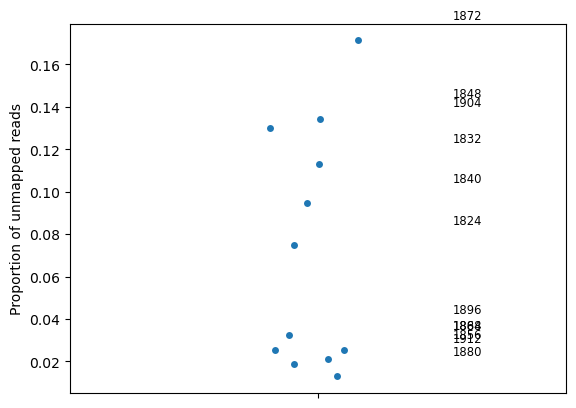

In [15]:
# count percentage in rows
rel_abundance_df = table.view(pd.DataFrame)
rel_abundance_df = rel_abundance_df.div(rel_abundance_df.sum(axis=1), axis=0)
unmapped = gg2_mapped.unmatched_sequences.view(pd.Series).index
# calculate percentage of unmapped in each row 
rel_abundance_df['unmapped'] = rel_abundance_df[unmapped].sum(axis=1)
# plot kdeplot of results
g = sns.stripplot(rel_abundance_df['unmapped'])
g.set(ylabel="Proportion of unmapped reads")
# add sample names over points
for i, point in enumerate(rel_abundance_df['unmapped'].index):
    g.text(0.3, rel_abundance_df['unmapped'][i]+0.01, rel_abundance_df['unmapped'].index[i], horizontalalignment='center', size='small', 
           color='black')

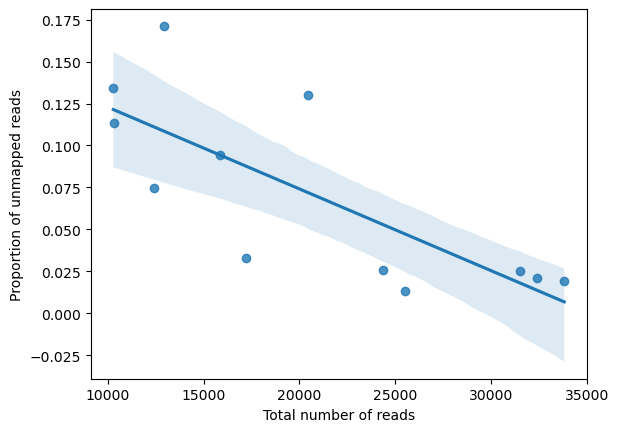

In [16]:
data = pd.concat([table.view(pd.DataFrame).sum(axis=1), rel_abundance_df["unmapped"]], axis=1)
data.columns = ["total", "unmapped"]
g = sns.regplot(x="total", y="unmapped", data=data, fit_reg=True)
g.set(xlabel="Total number of reads", ylabel="Proportion of unmapped reads");

In [17]:
rel_abundance_df["unmapped"]

1824    0.074641
1832    0.113178
1840    0.094463
1848    0.134363
1856    0.021085
1864    0.025424
1872    0.171263
1880    0.013007
1888    0.025458
1896    0.032709
1904    0.130059
1912    0.018949
Name: unmapped, dtype: float64

In [ ]:
!wget -O ../data/artifacts/gg2.2022.10.taxonomy.asv.nwk.qza http://ftp.microbio.me/greengenes_release/2022.10/2022.10.taxonomy.asv.nwk.qza

--2023-08-01 15:26:46--  http://ftp.microbio.me/greengenes_release/2022.10/2022.10.taxonomy.asv.nwk.qza
Resolving ftp.microbio.me (ftp.microbio.me)... 169.228.46.98
Connecting to ftp.microbio.me (ftp.microbio.me)|169.228.46.98|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193668351 (185M)
Saving to: ‘../data/artifacts/gg2.2022.10.taxonomy.asv.nwk.qza’

../data/artifacts/g 100%[===================>] 184.70M  14.6MB/s    in 13s     

2023-08-01 15:26:59 (14.5 MB/s) - ‘../data/artifacts/gg2.2022.10.taxonomy.asv.nwk.qza’ saved [193668351/193668351]



In [18]:
tax = greengenes2.methods.taxonomy_from_table(table = gg2_mapped.clustered_table,
                                              reference_taxonomy = Artifact.load(path["art"] + "gg2.2022.10.taxonomy.asv.nwk.qza"))

In [19]:
tax.classification.save(path["art"] + "tax-gg2.qza")

'../data/artifacts/tax-gg2.qza'

In [21]:
vis = taxa.visualizers.barplot(table = gg2_mapped.clustered_table,
                               taxonomy = Artifact.load(path["art"] + "tax-gg2.qza"),
                               metadata = metadata_df)
vis.visualization.save(path["vis"] + "gg2-barplot.qzv")

'../visualizations/gg2-barplot.qzv'

In [22]:
gg2_mapped.clustered_table.view(pd.DataFrame).sum(axis=1)

1824    11480.0
1832     9152.0
1840    14360.0
1848     8910.0
1856    31710.0
1864    30705.0
1872    10728.0
1880    25192.0
1888    23734.0
1896    16679.0
1904    17799.0
1912    33186.0
dtype: float64

## 2.2. SILVA 138.1

### 2.2.1. Naive

Regular SILVA classifier for V3-V4 primers from the study

In [52]:
tax = feature_classifier.methods.classify_sklearn(
    reads=rep_seqs,
    classifier=Artifact.load(path["art"] + "classifier-silva-138.1-ssu-341f-806r.qza"),
    n_jobs=16
)

In [55]:
tax.classification.save(path["art"] + "tax-silva-138.1-samples.qza")

'../data/artifacts/tax-silva-138.1-samples.qza'

In [57]:
vis = taxa.visualizers.barplot(table=table,
                               taxonomy=tax.classification)
vis.visualization.save(path["vis"] + "silva-naive-barplot.qzv")

'../visualizations/silva-naive-barplot.qzv'